<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn Project
Jamaal Smith



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Import and Cleaning

In [73]:
#import the data
df = pd.read_csv('churn_data.csv')

#characteristics of the data
from scrubbing import info
info(df)

(  state  account length  ...  customer service calls  churn
 0    KS             128  ...                       1  False
 1    OH             107  ...                       1  False
 2    NJ             137  ...                       0  False
 3    OH              84  ...                       2  False
 4    OK              75  ...                       3  False
 
 [5 rows x 21 columns], state                      object
 account length              int64
 area code                   int64
 phone number               object
 international plan         object
 voice mail plan            object
 number vmail messages       int64
 total day minutes         float64
 total day calls             int64
 total day charge          float64
 total eve minutes         float64
 total eve calls             int64
 total eve charge          float64
 total night minutes       float64
 total night calls           int64
 total night charge        float64
 total intl minutes        float64
 total intl ca

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

In [74]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Voicemail and International Plan treatment

In these two columns, the number 1 signifies yes and 0 signifies no

In [75]:
key = {'yes':1, 'no':0}
df['international plan']=df['international plan'].map(key)
df['voice mail plan'] = df['voice mail plan'].map(key)

df['international plan'].astype(str).astype(float)
df['voice mail plan'].astype(str).astype(float)

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3328    1.0
3329    0.0
3330    0.0
3331    0.0
3332    1.0
Name: voice mail plan, Length: 3333, dtype: float64

As noted before, since it is hard to argue that a given phone number has any relation to churn rate, this column will be eliminated now as part of the feature selection process.

In [0]:
df.drop('phone number', axis = 1)

### Treatment of State Column

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
WA     66
NV     66
CO     66
MA     65
MS     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

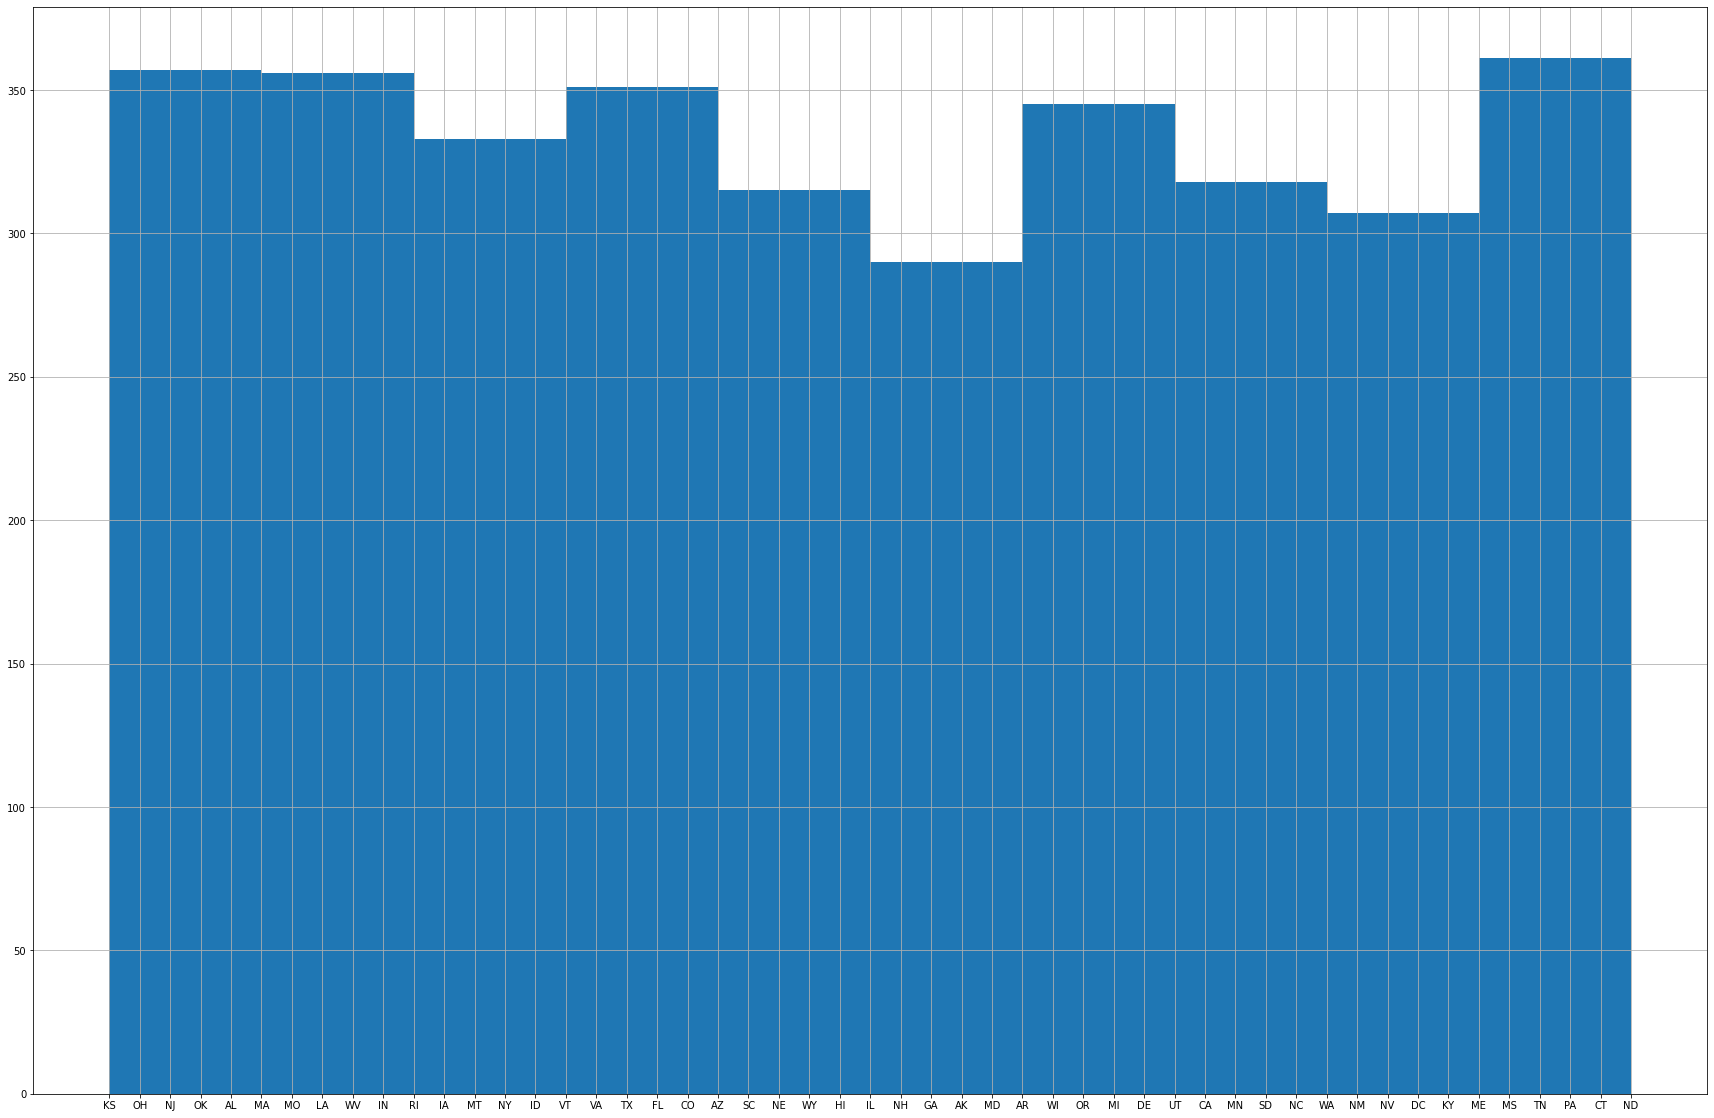

In [92]:
fig, ax = plt.subplots(figsize = (30,20)) 
df['state'].hist()
display(df['state'].value_counts())

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

## Visual Representation of Data Normality